Copyright 2019 The TensorFlow Authors.
https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb#scrollTo=h2q27gKz1H20

In [1]:
!pip install tflite-model-maker

     |████████████████████████████████| 122kB 10.5MB/s 
     |████████████████████████████████| 344.9MB 23kB/s 
     |████████████████████████████████| 1.1MB 41.6MB/s 
     |████████████████████████████████| 460kB 39.7MB/s 
     |████████████████████████████████| 849kB 36.4MB/s 
     |████████████████████████████████| 1.0MB 23.9MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 10.6MB 163kB/s 
     |████████████████████████████████| 174kB 46.3MB/s 
     |████████████████████████████████| 358kB 45.0MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 36.7MB 69kB/s 
     |████████████████████████████████| 194kB 44.3MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=2a2f902ea6cdd7fc3db9b383c78b13d18b7b8cec831021d976cf206720ebea04
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
  Created wheel 

In [2]:
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt
print("Done importing!")

Done importing!


Mount Google Drive now.

In [ ]:
!unzip './drive/MyDrive/Colab_Notebooks/AndroidAge/age_data.zip'

In [9]:
image_path = './age_data'

Step 1. Load input data specific to an on-device ML app. Split it to training data and testing data.

In [10]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 10674, num_label: 9, labels: 04-06, 07-08, 09-11, 12-19, 20-27, 28-35, 36-45, 46-60, 61-75.


Step 2. Customize/Train the TensorFlow model.

In [11]:
from datetime import datetime
x = datetime.now()
print(x)

epochs = 5  # 5 by default
batch_size = None # None by default
learning_rate = None # None by default
momentum = None # None by default
shuffle = False # False by default
use_augmentation = False # False by default

model = image_classifier.create(train_data, 
                                epochs=epochs, 
                                batch_size=batch_size)

y = datetime.now()
print(y)
print("Training duration: {}".format(abs(y-x)))

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 9)                 11529     
Total params: 3,424,553
Trainable params: 11,529
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
300/300 [==============================] - 467s 2s/step - loss: 1.9437 - accuracy: 0.2893
Epoch 2/5
300/300 [==============================] - 463s 2s/step - loss: 1.7124 - accuracy: 0.3819
Epoch 3/5
300/300 [==============================] - 464s 2s/step - loss: 1.6678 - accuracy: 0.4074
Epoch 4/5
300/300 [======

Step 3. Evaluate the model.

In [12]:
loss, accuracy = model.evaluate(test_data)

34/34 [==============================] - 56s 2s/step - loss: 1.6146 - accuracy: 0.4288


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

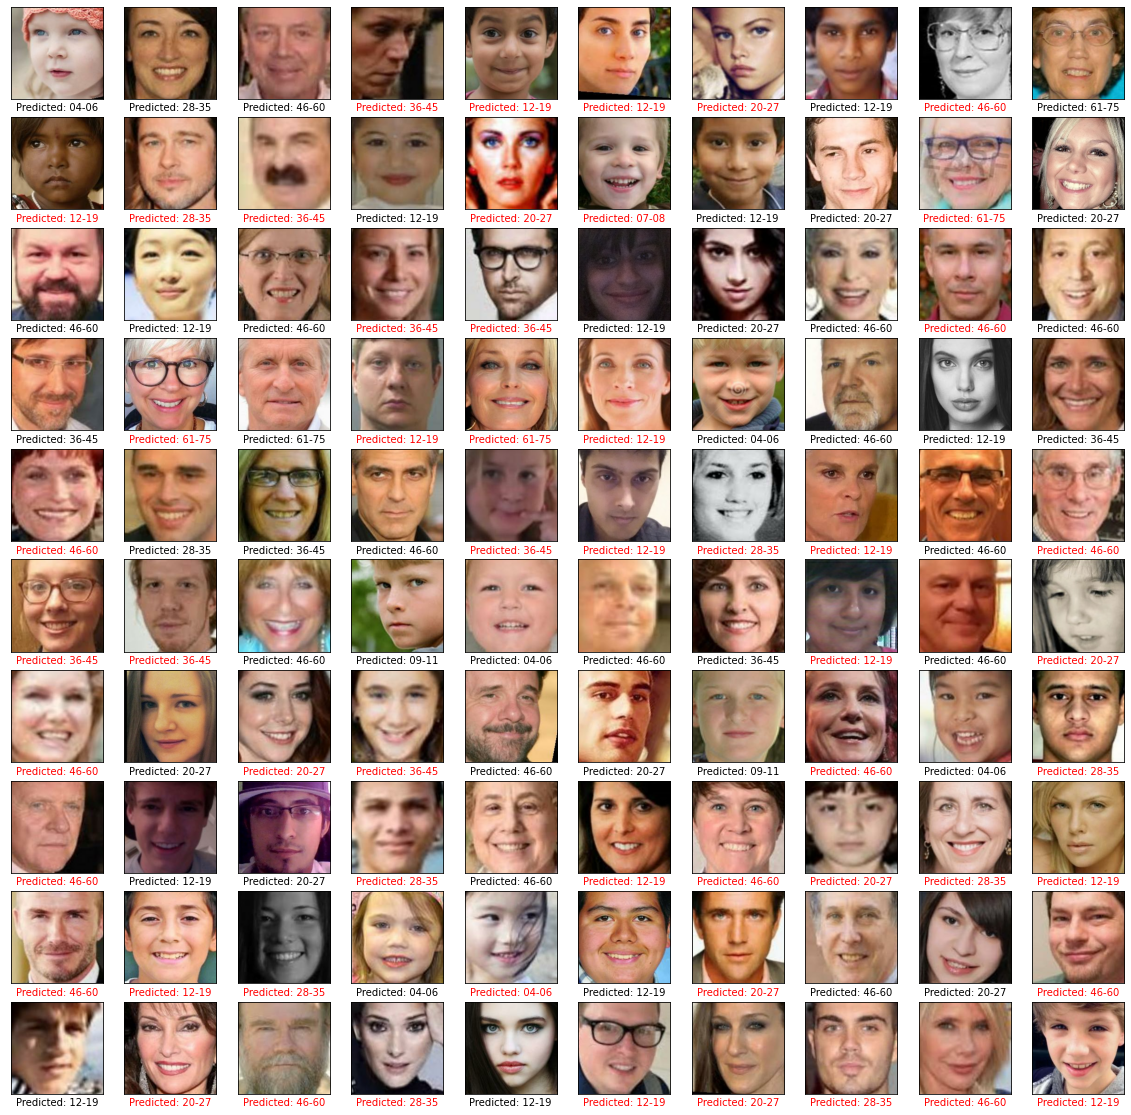

In [13]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

Step 4. Export to (float?) TensorFlow Lite model.

In [15]:
model.export(export_dir='.')
model.export(export_dir='.', export_format=ExportFormat.LABEL)
# model.export(export_dir='.', export_format=ExportFormat.TFLITE)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpx9e8w02f/assets


INFO:tensorflow:Assets written to: /tmp/tmpx9e8w02f/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpvi212r5x/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpvi212r5x/labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


Save model to Google Drive

In [16]:
%cp 'model.tflite' './drive/MyDrive/Colab_Notebooks/AndroidAge/AndroidAge.tflite'
%cp 'labels.txt' './drive/MyDrive/Colab_Notebooks/AndroidAge/AndroidAge.txt'
print("Saved!")

Saved!


**After** this simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Post-training quantization on the TensorFLow Lite model

[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator latency, with little degradation in model accuracy. Thus, it's widely used to optimize the model.

Model Maker supports multiple post-training quantization options. Let's take full integer quantization as an instance. First, define the quantization config to enforce full integer quantization for all ops including the input and output. The input type and output type are `uint8` by default. You may also change them to other types like `int8` by setting `inference_input_type` and `inference_output_type` in config.

In [17]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

Then we export the **quantized** TensorFlow Lite model with such configuration.

In [18]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp266uyyu9/assets


INFO:tensorflow:Assets written to: /tmp/tmp266uyyu9/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp2je07_3j/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp2je07_3j/labels.txt.


In [19]:
%cp 'model_quant.tflite' './drive/MyDrive/Colab_Notebooks/AndroidAge/AndroidAge_quant.tflite'